In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.ICA_EM import CausalVarEM
import tqdm
import pandas as pd

In [92]:
n = 10000
def create_dataset(seed, model):
    np.random.seed(seed)
    coef_matrix = np.zeros((3,3))
    if model == "1":
        coef_matrix[1,0] = 1
        coef_matrix[2,0] = 1
        coef_matrix[2,1] = 1
        N_u = np.random.laplace(0, 1/np.sqrt(2), n)
        N_t = np.random.laplace(0, 1/np.sqrt(2), n)
        N_y = np.random.laplace(0, 1/np.sqrt(2), n)
    elif model == "2":
        coef_matrix[1,0] = 1
        coef_matrix[2,0] = -1
        coef_matrix[2,1] = 2
        N_u = np.random.laplace(0, 1/np.sqrt(2), n)
        N_t = np.random.laplace(0, 1/np.sqrt(2), n)
        N_y = np.random.laplace(0, 1/np.sqrt(2), n)
    mixing_matrix = np.linalg.inv(np.eye(3) - coef_matrix)
    X = mixing_matrix @ np.array([N_u, N_t, N_y])
    return {"treatment_effect": mixing_matrix[2,1], "data": X.T, "mixing_matrix": mixing_matrix}

In [76]:
out = create_dataset(2, "1")
out2 = create_dataset(2, "2")
print(out["mixing_matrix"])
print(out2["mixing_matrix"])


[[1. 0. 0.]
 [1. 1. 0.]
 [2. 1. 1.]]
[[ 1.  0.  0.]
 [ 1.  1. -0.]
 [ 1.  2.  1.]]


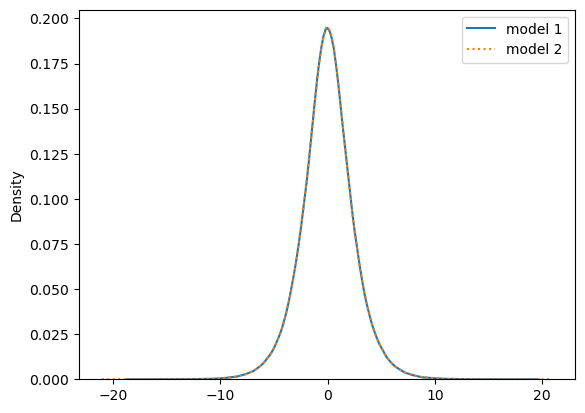

In [87]:
plt.figure()
sns.kdeplot(out["data"][:,2], label="model 1")
sns.kdeplot(out2["data"][:,2], label="model 2", linestyle='dotted')
plt.legend()
plt.show()

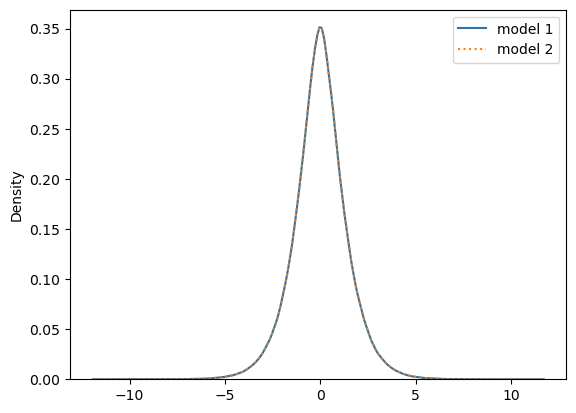

In [86]:
plt.figure()
sns.kdeplot(out["data"][:,1], label="model 1")
sns.kdeplot(out2["data"][:,1], label="model 2", linestyle='dotted')
plt.legend()

## Estimate mixing matrix for both outputs of the model

In [99]:
model1_est = []
model2_est = []
for i in tqdm.tqdm(range(100)):
    data1 = create_dataset(i, "1")
    data2 = create_dataset(i, "2")
    est = CausalVarEM(mode = "lower_triangular", max_iter = 20, random_seed = i)
    est.fit(data1["data"][:, :2], J = 3, progress_bar=False)
    model1_est.append(est.A)
    est = CausalVarEM(mode = "lower_triangular", max_iter = 20, random_seed = i)
    est.fit(data2["data"][:, :2], J = 3, progress_bar=False)
    model2_est.append(est.A)

treatment_effect1 = 1
treatment_effect2 = 2

 55%|█████▌    | 55/100 [08:03<06:40,  8.91s/it]

In [ ]:
model1 = pd.Dataframe({"confounder_col": matrix[1,0] for matrix in model1_est,
                       "treatment_col": matrix[1,1] for matrix in model1_est})
model2 = pd.Dataframe({"confounder_col": matrix[1,0] for matrix in model2_est,
                          "treatment_col": matrix[1,1] for matrix in model2_est})

